# scikitlearn 패키지를 활용한 선형회귀(Linear Regression)
- 무작위 데이터
- make_regression()
- 당뇨병 관련 10가지 진단 데이터 : 당뇨병 지수 추정

<h3>Data(학습용/검증용)</h3>
- model.fit(학습용 데이터(x,y()) &nbsp&nbsp # 학습<br>
- model.predict() &nbsp&nbsp&nbsp&nbsp # 학습된 모델로 추정<br>
- model.score()  &nbsp&nbsp&nbsp&nbsp # 정확도<br>
- y = a*x + b  &nbsp&nbsp&nbsp&nbsp   # a:계수(coef_), b:절편(intercept_)

In [57]:
#직선의 방정식: y = a*x+b
import numpy as np
np.random.seed(0)
y = np.arange(100)
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

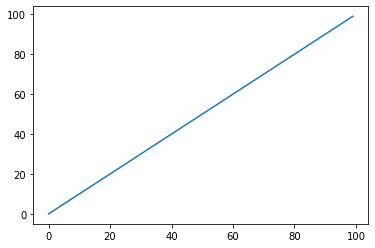

In [58]:
#산점도
import matplotlib.pyplot as plt
plt.plot(y)

In [68]:
rd = np.random.randint(-15,15,100)  #무작위 데이터 0~15까지 100개의 수 출력
y = y + rd
y

array([184, 192, 140, 141, 147, 179, 167, 179, 168, 182, 184, 181, 174,
       174, 171, 164, 205, 198, 197, 209, 179, 183, 212, 194, 198, 191,
       197, 184, 204, 171, 183, 240, 170, 204, 218, 197, 240, 218, 210,
       220, 203, 224, 235, 180, 192, 222, 234, 203, 214, 230, 198, 233,
       237, 188, 211, 226, 202, 249, 247, 221, 229, 224, 266, 248, 243,
       225, 231, 243, 247, 241, 254, 230, 269, 234, 244, 229, 233, 273,
       227, 280, 255, 230, 233, 253, 237, 267, 228, 237, 272, 275, 267,
       263, 260, 288, 265, 256, 268, 269, 305, 312])

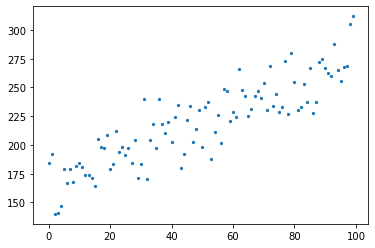

In [69]:
#위의 y를 산점도로 표현
x = np.arange(100)
plt.scatter(x,y,s=5) #s는 scatter 사이즈

In [70]:
x_train = x[:80]
y_train = y[:80]

x_test = x[-20:]
y_test = y[-20:]

In [71]:
from sklearn import linear_model #선형회귀 모델 알고리즘
linreg = linear_model.LinearRegression()

In [72]:
x_train.shape #(80,)
x_train = x_train.reshape(-1,1) #1차원 데이터인 x_train을 2차원 데이터로 변환하여 새로운 메모리공간에 저장, (80,1)
linreg.fit(x_train,y_train) #학습된 회귀형 결과 출력

LinearRegression()

In [73]:
linreg.coef_, linreg.intercept_

(array([1.10051571]), 166.12962962962962)

In [74]:
linreg.predict(x_test.reshape(-1,1))

array([254.17088608, 255.27140178, 256.37191749, 257.47243319,
       258.5729489 , 259.6734646 , 260.77398031, 261.87449602,
       262.97501172, 264.07552743, 265.17604313, 266.27655884,
       267.37707454, 268.47759025, 269.57810595, 270.67862166,
       271.77913737, 272.87965307, 273.98016878, 275.08068448])

In [75]:
linreg.score(x_test.reshape(-1,1),y_test)

0.32601738959186366

<h3>집값: 평수, 전철, 위치, 학군..</h3>
- y = a1(가중치) * x1(평수) + a2 * x2 + ... + an * xn <br>
- [&nbsp[x1,x2,x3,..,xn],...,[x1,x2,x3,..,xn]&nbsp] &nbsp&nbsp&nbsp #자료구조 <br>
- y값은 2차원

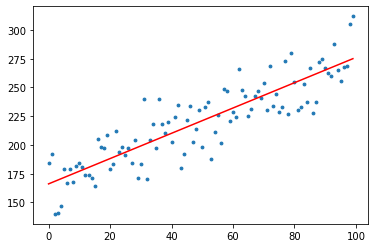

In [76]:
plt.scatter(x,y,s=8)

a = linreg.coef_
b = linreg.intercept_
y2 = a*x + b

plt.plot(x,y2,'r') #직선 그래프는 빨강색선으로 표현

In [77]:
linreg.predict([[150],[200]])

array([331.20698547, 386.23277075])

<h3>기울기 0.5, y절편 20인 데이터셋 회귀분석</h3>

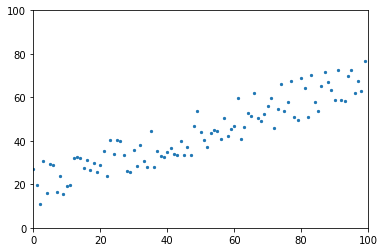

In [80]:
x = np.arange(100)
y = 0.5*x +20 #직선의 방정식, y절편 ( y = a*x+b)
noise = np.random.randint(-10,10,100)
y2 = y+noise

#plt.ylim(0,100)
plt.axis([0,100,0,100])
plt.scatter(x,y2,s=5)

<h3>학습용/검증용 분할</h3>
- 학습용 데이터를 사용하여 학습

In [81]:
#학습용
x_train = x[:80]
y_train = y[:80]

#검증용
x_test = x[-20:]
y_test = y[-20:]

In [82]:
X_train = x_train.reshape(-1,1) #1차원 데이터인 x_train을 2차원 데이터로 변환하여 새로운 메모리공간에 저장, (80,1)
X_train.shape #대문자 X는 2차원 데이터, 소문자 x는 1차원 데이터

(80, 1)

In [84]:
X_test = x_test.reshape(-1,1)
X_test.shape

(20, 1)

In [85]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

In [87]:
#기울기와 점선이 학습
linreg.fit(X_train,y_train)

LinearRegression()

In [88]:
linreg.coef_, linreg.intercept_

(array([0.5]), 20.0)

In [90]:
linreg.score(X_test,y_test) 

1.0

In [91]:
linreg.predict([[10000]])


array([5020.])

In [102]:
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100, n_features=1, random_state=0, noise=4.0, bias=100.0
)


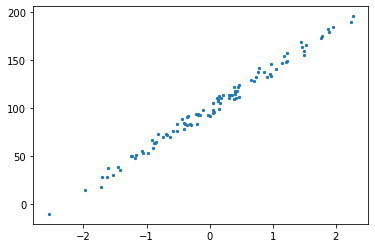

In [103]:
plt.scatter(X.flatten(),y,s=5)

In [104]:
#features가 3인 그래프 출력
linreg.predict([[10000]])

from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100, n_features=3, random_state=0, noise=10.0, bias=100.0
)


In [108]:
X.shape

(100, 3)

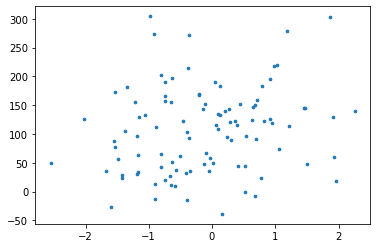

In [112]:
X[:,0] # x1 값
plt.scatter(X[:,1],y,s=7)

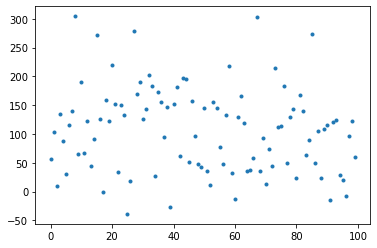

In [110]:
plt.plot(np.arange(100),y,'.') #산점도

### 평수, 방수, 교통거리
y = a*x + b
y = w1*x1 + w2*x2 + x3*x3 + b

In [114]:
#상관계수:
np.corrcoef(X[:,0],y)
np.corrcoef(X[:,1],y)
np.corrcoef(X[:,2],y)

array([[1.        , 0.83000816],
       [0.83000816, 1.        ]])

In [115]:
linreg.predict(X_test[0,np.newaxis]),y_test[0]

(array([60.]), 60.0)

In [116]:
linreg.predict(X_test[1,np.newaxis]),y_test[1]

(array([60.5]), 60.5)

In [117]:
linreg.predict(X_test[2,np.newaxis]),y_test[2]

(array([61.]), 61.0)